# 1.

In [ ]:
! git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

fatal: destination path 'Sign-Language-Digits-Dataset' already exists and is not an empty directory.


# 2.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# image_path = '/content/Sign-Language-Digits-Dataset/Dataset'
# images = ImageDataGenerator().flow_from_directory(image_path,target_size=(100,100),batch_size=32)
# from sklearn.model_selection import train_test_split
# features, labels = next(images)
# X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2)

import os
import shutil

# Path to the main directory containing folders 0-9
main_directory = '/content/Sign-Language-Digits-Dataset/Dataset'

# Path to the destination directory where train and test folders will be created
destination_directory = '/content/Dataset2/'

# Paths to the root-level train and test directories
train_root_directory = os.path.join(destination_directory, 'train')
test_root_directory = os.path.join(destination_directory, 'test')

# Number of files to move to the test directory
num_test_files = 63

# Create 'train' and 'test' directories inside Dataset2
os.makedirs(train_root_directory, exist_ok=True)
os.makedirs(test_root_directory, exist_ok=True)

# Iterate over folders 0 through 9 in the original Dataset
for folder in range(10):
    folder_path = os.path.join(main_directory, str(folder))
    if not os.path.isdir(folder_path):
        continue

    # Create subdirectories '0-9' inside both the train and test directories
    train_directory = os.path.join(train_root_directory, str(folder))
    test_directory = os.path.join(test_root_directory, str(folder))
    os.makedirs(train_directory, exist_ok=True)
    os.makedirs(test_directory, exist_ok=True)

    files = os.listdir(folder_path)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]

    # Sort files to ensure deterministic behavior (optional)
    files.sort()

    # Move first 63 files to the test directory and the rest to the train directory
    for i, file_name in enumerate(files):
        file_path = os.path.join(folder_path, file_name)
        if i < num_test_files:
            shutil.move(file_path, os.path.join(test_directory, file_name))
        else:
            shutil.move(file_path, os.path.join(train_directory, file_name))

X_train_path = '/content/Dataset2/train'
X_test_path = '/content/Dataset2/test'

X_train = ImageDataGenerator().flow_from_directory(X_train_path,target_size=(100,100),batch_size=32)
X_test = ImageDataGenerator().flow_from_directory(X_test_path,target_size=(100,100),batch_size=1)

Found 1432 images belonging to 10 classes.
Found 630 images belonging to 10 classes.


# 3.

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = "imagenet" , include_top=False,input_shape=(100,100,3))
model.summary()
for layer in model.layers:
  layer.trainable = False

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# 4.

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

last_layer = model.get_layer('block5_pool')
last_output = last_layer.output

d1 = GlobalAveragePooling2D()(last_output)

d1 = Dense(512,activation = "relu")(d1)
d1 = Dense(64,activation = "relu")(d1)
d1 = Dense(10, activation='softmax',name='softmax')(d1)

new_model = Model(inputs=model.input,outputs = d1)
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,010,826 (57.26 MB)

 Trainable params: 296,138 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# 5.


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 216s 23s/step - accuracy: 0.1118 - loss: 9.6308 - val_accuracy: 0.0999 - val_loss: 6.2052
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 238s 26s/step - accuracy: 0.1005 - loss: 5.5760 - val_accuracy: 0.0978 - val_loss: 4.5262
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 247s 27s/step - accuracy: 0.0592 - loss: 4.2777 - val_accuracy: 0.1446 - val_loss: 3.7725
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 22s/step - accuracy: 0.1669 - loss: 3.6910 - val_accuracy: 0.1823 - val_loss: 3.2413
Epoch 5/30
 5/10 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.2342 - loss: 2.8520

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 186s 20s/step - accuracy: 0.2390 - loss: 2.8422 - val_accuracy: 0.2137 - val_loss: 3.0796
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 252s 26s/step - accuracy: 0.2090 - loss: 3.1756 - val_accuracy: 0.2353 - val_loss: 2.8238
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 240s 26s/step - accuracy: 0.2701 - loss: 2.7144 - val_accuracy: 0.2619 - val_loss: 2.6644
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 22s/step - accuracy: 0.2617 - loss: 2.6473 - val_accuracy: 0.2779 - val_loss: 2.5274
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 239s 26s/step - accuracy: 0.2829 - loss: 2.4023 - val_accuracy: 0.3031 - val_loss: 2.4227
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 220s 24s/step - accuracy: 0.3014 - loss: 2.4544 - val_accuracy: 0.3024 - val_loss: 2.3774
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 260s 26s/step - accuracy: 0.2999 - loss: 2.4510 - val_accuracy: 0.3205 - val_loss: 2.2884
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 206s 22s/step - accuracy: 0.3508 - loss: 2.2814 - val_accuracy: 0.3422 - v

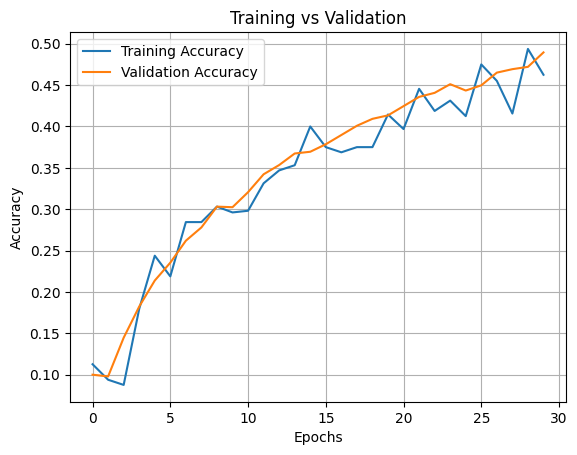

In [ ]:
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
new_model.compile(
    SGD(learning_rate=0.0001),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'],
)
acctemp = new_model.fit(X_train,epochs = 30,validation_data=X_train,validation_split =0.1,steps_per_epoch=10)

plt.plot(acctemp.history["accuracy"],label='Training Accuracy')
plt.plot(acctemp.history["val_accuracy"],label='Validation Accuracy')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
new_model.save('tranfer_cnn.keras')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('tranfer_cnn.keras')

# pre = loaded_model.predict(test_images)
# pre

KeyboardInterrupt: 

# 6.


In [ ]:
new_model.evaluate(X_test)

  1/630 ━━━━━━━━━━━━━━━━━━━━ 1:37 156ms/step - accuracy: 0.0000e+00 - loss: 1.4213

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


630/630 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.3403 - loss: 2.2485


[2.312030792236328, 0.3539682626724243]

# 7.


In [ ]:
new_model.save('sign_vgg.h5')

# 8.


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/Thaibang/ThaiBankNotes/Training'
test_path = '/content/drive/MyDrive/Thaibang/ThaiBankNotes/test'
X_train = ImageDataGenerator().flow_from_directory(train_path,target_size=(227,227),batch_size=32)
X_test = ImageDataGenerator().flow_from_directory(test_path,target_size=(227,227),batch_size=1)
# !ls /content/drive/MyDrive/Thaibang/ThaiBankNotes/test


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


# 9.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy as np

model = ResNet50(weights='imagenet',include_top=False,input_shape=(227,227,3))
model.summary()
for layer in model.layers:
  layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 227, 227, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 233, 233, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 114, 114, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 114, 114, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 114, 114, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 116, 116, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 57, 57, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 57, 57, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 57, 57, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 57, 57, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 57, 57, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# 10-11.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

last_layer = model.get_layer('conv5_block3_out')
last_output = last_layer.output

d1 = Flatten()(last_output)

d1 = Dense(100,activation = "relu",name="FC_dense")(d1)
d1 = Dense(5, activation='softmax',name='softmax')(d1)

new_model = Model(inputs=model.input,outputs = d1)
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 227, 227, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 233, 233, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 114, 114, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 114, 114, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 114, 114, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 116, 116, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 57, 57, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 57, 57, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 57, 57, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 57, 57, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 57, 57, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 36,695,517 (139.98 MB)

 Trainable params: 13,107,805 (50.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# 12-13.


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 477s 14s/step - accuracy: 0.2336 - loss: 2.3634 - val_accuracy: 0.3137 - val_loss: 1.7826
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 653ms/step - accuracy: 0.2952 - loss: 1.7163 - val_accuracy: 0.4450 - val_loss: 1.3917
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 677ms/step - accuracy: 0.4860 - loss: 1.3657 - val_accuracy: 0.5450 - val_loss: 1.1420
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.5569 - loss: 1.1186 - val_accuracy: 0.6637 - val_loss: 0.9528
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 653ms/step - accuracy: 0.6457 - loss: 0.9432 - val_accuracy: 0.7375 - val_loss: 0.8080
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 746ms/step - accuracy: 0.7375 - loss: 0.8187 - val_accuracy: 0.8012 - val_loss: 0.6903
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 689ms/step - accuracy: 0.7973 - loss: 0.6885 - val_accuracy: 0.8512 - val_loss: 0.5969
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 737ms/step - accuracy: 0.8407 - loss: 0.6187 - val_accuracy: 0.9000

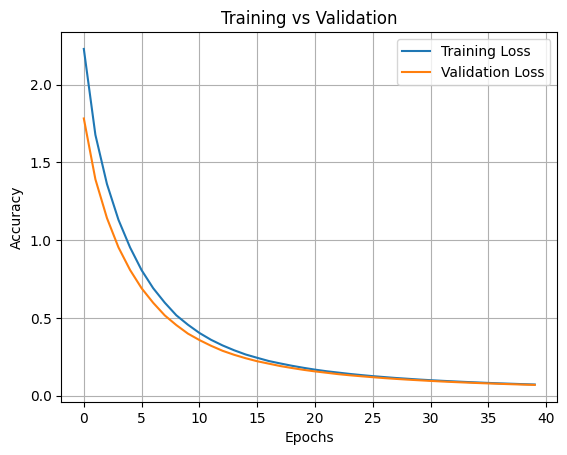

In [ ]:
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
new_model.compile(
    SGD(learning_rate=0.00004),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'],
)
acctemp = new_model.fit(X_train,epochs = 40,validation_data=X_train,validation_split =0.1)

plt.plot(acctemp.history["loss"],label='Training Loss')
plt.plot(acctemp.history["val_loss"],label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 14.

In [ ]:
new_model.evaluate(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 151s 747ms/step - accuracy: 0.4046 - loss: 1.6462


[1.7343209981918335, 0.41499999165534973]

# 15.

In [ ]:
new_model.save('Thai_banknotes_Rense50.h5')